In [122]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **Step 1 : Load the Data**

In [123]:
# Load the weather dataset
data = pd.read_csv('/content/gdrive/MyDrive/weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [124]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [125]:
# Print the only columns i need
data=data[['Formatted Date','Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)']]
data

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,2006-04-01 00:00:00.000 +0200,9.472222,0.89,14.1197,15.8263
1,2006-04-01 01:00:00.000 +0200,9.355556,0.86,14.2646,15.8263
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,3.9284,14.9569
3,2006-04-01 03:00:00.000 +0200,8.288889,0.83,14.1036,15.8263
4,2006-04-01 04:00:00.000 +0200,8.755556,0.83,11.0446,15.8263
...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43,10.9963,16.1000
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48,10.0947,15.5526
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56,8.9838,16.1000
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60,10.5294,16.1000


# **Step 2 : Preprocessing the Data**

In [126]:
# Filtering data from zeros
data.filter(like='0.00',axis=None)
data

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,2006-04-01 00:00:00.000 +0200,9.472222,0.89,14.1197,15.8263
1,2006-04-01 01:00:00.000 +0200,9.355556,0.86,14.2646,15.8263
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,3.9284,14.9569
3,2006-04-01 03:00:00.000 +0200,8.288889,0.83,14.1036,15.8263
4,2006-04-01 04:00:00.000 +0200,8.755556,0.83,11.0446,15.8263
...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43,10.9963,16.1000
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48,10.0947,15.5526
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56,8.9838,16.1000
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60,10.5294,16.1000


In [127]:
data.dtypes

Formatted Date        object
Temperature (C)      float64
Humidity             float64
Wind Speed (km/h)    float64
Visibility (km)      float64
dtype: object

In [128]:
# Convert Formatted Date to Datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

<ipython-input-128-2f0dea8379d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)


In [129]:
data.dtypes

Formatted Date       datetime64[ns, UTC]
Temperature (C)                  float64
Humidity                         float64
Wind Speed (km/h)                float64
Visibility (km)                  float64
dtype: object

In [130]:
data.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,10.347325
std,9.551546,0.195473,6.913571,4.192123
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,8.339800
50%,12.000000,0.780000,9.965900,10.046400
75%,18.838889,0.890000,14.135800,14.812000
max,39.905556,1.000000,63.852600,16.100000


In [131]:
# Set 'Formatted Date' column as index
data = data.set_index('Formatted Date')

In [132]:
# Resample the data to daily frequency and calculate mean 
data_daily = data.resample('D').mean()
data_daily

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
Formatted Date,,,,
2005-12-31 00:00:00+00:00,0.577778,0.890000,17.114300,9.982000
2006-01-01 00:00:00+00:00,4.075000,0.817083,21.229192,11.348487
2006-01-02 00:00:00+00:00,5.263194,0.847083,17.824713,8.492079
2006-01-03 00:00:00+00:00,2.340509,0.897083,7.726658,9.223958
2006-01-04 00:00:00+00:00,2.251852,0.906667,12.152817,8.352546
...,...,...,...,...
2016-12-27 00:00:00+00:00,0.278009,0.890000,10.979529,7.303362
2016-12-28 00:00:00+00:00,0.222222,0.890000,10.968125,7.304704
2016-12-29 00:00:00+00:00,0.167824,0.889583,10.876892,7.310071


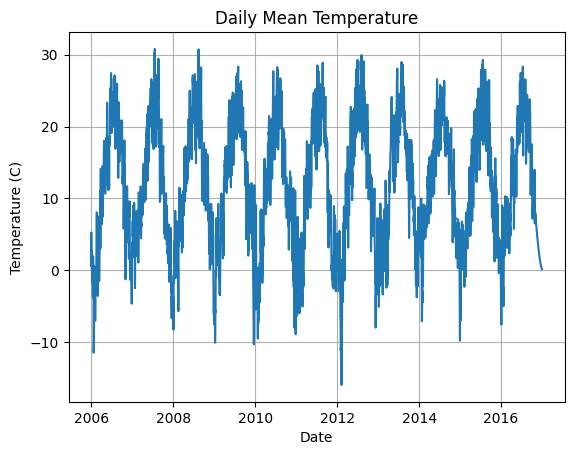

In [133]:
# Plot the daily mean temperature data
plt.plot(data_daily.index, data_daily['Temperature (C)'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Daily Mean Temperature')
plt.grid(True)
plt.show()

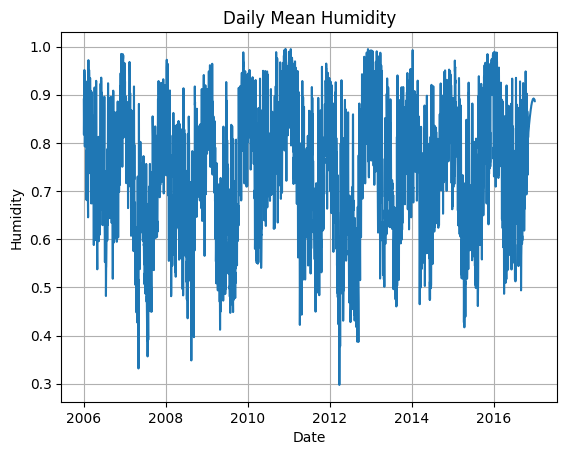

In [134]:
# Plot the daily mean humidity data
plt.plot(data_daily.index, data_daily['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Daily Mean Humidity')
plt.grid(True)
plt.show()

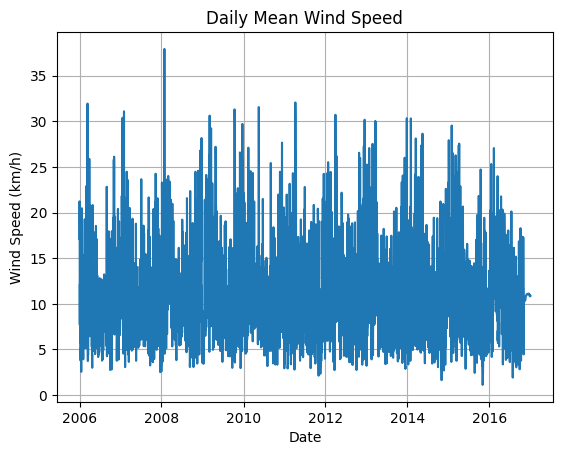

In [135]:
# Plot the daily mean Wind Speed data
plt.plot(data_daily.index, data_daily['Wind Speed (km/h)'])
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Daily Mean Wind Speed')
plt.grid(True)
plt.show()

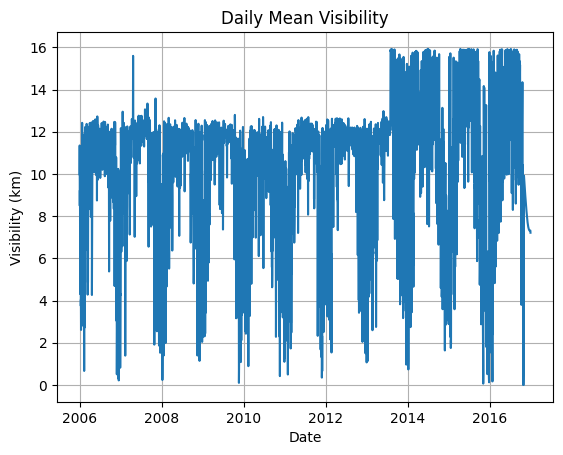

In [136]:
# Plot the daily mean Visibility data
plt.plot(data_daily.index, data_daily['Visibility (km)'])
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.title('Daily Mean Visibility')
plt.grid(True)
plt.show()

# **Step 3 : Split the dataset into training and testing sets**

In [137]:
# Slice the data for training and testing
train_data = data_daily.loc['2016'].copy()
test_data = data_daily.loc['2016':'2017'].copy()

# ***Temperature***

## **Step 4 : Initialize and fit the Autoregressive Integrated Moving Average model**

In [138]:
# Initialize and fit the ARIMA model
#(1,0,0) means 1 autoregresstive term, no moving average or differencing terms
arima_model_temp = ARIMA(train_data['Temperature (C)'], order=(1, 0, 0))
arima_model_fit_temp = arima_model_temp.fit()

# Generate forecasts for the future time points using ARIMA
# forecast generate prediction, steps --> no. of points
arima_forecast_temp = arima_model_fit_temp.predict(start=test_data.index[0], end=test_data.index[-1])

## **Step 5 : Initialize and fit the Seasonal Autoregressive Integrated Moving Average model**

In [139]:
# Initialize and fit the SARIMA model
# seasonal_order --> by3rfny eno h3ml model 1,0,0 for both non-seasonal and seasonal compo
sarima_model_temp = SARIMAX(train_data['Temperature (C)'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarima_model_fit_temp = sarima_model_temp.fit()

# Generate forecasts for the future time points using SARIMA
sarima_forecast_temp = sarima_model_fit_temp.predict(start=test_data.index[0], end=test_data.index[-1])

## **Step 6 : Initialize and fit the Seasonal Autoregressive Integrated Moving Average model with eXogenous factors**

In [140]:
# Initialize and fit the SARIMAX model
sarimax_model_temp = SARIMAX(train_data['Temperature (C)'], exog=train_data[['Humidity']], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarimax_model_fit_temp = sarimax_model_temp.fit()

# Generate forecasts for the future time points using SARIMAX
sarimax_forecast_temp = sarimax_model_fit_temp.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[['Humidity']])

## ***Add the predicted values to the dataset***

In [141]:
# Add the predicted values to the dataset
data_daily['ARIMA Forecast'] = arima_forecast_temp
data_daily['SARIMA Forecast'] = sarima_forecast_temp
data_daily['SARIMAX Forecast'] = sarimax_forecast_temp

## **Step 7 : Calculate the evaluation metrices**

In [142]:
# Calculate evaluation metrics for ARIMA
arima_mae_temp = mean_absolute_error(test_data['Temperature (C)'], arima_forecast_temp)
arima_mse_temp = mean_squared_error(test_data['Temperature (C)'], arima_forecast_temp)
arima_rmse_temp = mean_squared_error(test_data['Temperature (C)'], arima_forecast_temp, squared=False)

# Calculate evaluation metrics for SARIMA
sarima_mae_temp = mean_absolute_error(test_data['Temperature (C)'], sarima_forecast_temp)
sarima_mse_temp = mean_squared_error(test_data['Temperature (C)'], sarima_forecast_temp)
sarima_rmse_temp = mean_squared_error(test_data['Temperature (C)'], sarima_forecast_temp, squared=False)

# Calculate evaluation metrics for SARIMAX
sarimax_mae_temp = mean_absolute_error(test_data['Temperature (C)'], sarimax_forecast_temp)
sarimax_mse_temp = mean_squared_error(test_data['Temperature (C)'], sarimax_forecast_temp)
sarimax_rmse_temp = mean_squared_error(test_data['Temperature (C)'], sarimax_forecast_temp, squared=False)

print("Errors for the Tempreture : ")
print("ARIMA - Mean Absolute Error (MAE):", arima_mae_temp)
print("ARIMA - Mean Squared Error (MSE):", arima_mse_temp)
print("ARIMA - Root Mean Squared Error (RMSE):", arima_rmse_temp)
print()
print("SARIMA - Mean Absolute Error (MAE):", sarima_mae_temp)
print("SARIMA - Mean Squared Error (MSE):", sarima_mse_temp)
print("SARIMA - Root Mean Squared Error (RMSE):", sarima_rmse_temp)
print()
print("SARIMAX - Mean Absolute Error (MAE):", sarimax_mae_temp)
print("SARIMAX - Mean Squared Error (MSE):", sarimax_mse_temp)
print("SARIMAX - Root Mean Squared Error (RMSE):", sarimax_rmse_temp)

Errors for the Tempreture : 
ARIMA - Mean Absolute Error (MAE): 1.5375919928684045
ARIMA - Mean Squared Error (MSE): 4.709340375968254
ARIMA - Root Mean Squared Error (RMSE): 2.170101466744874

SARIMA - Mean Absolute Error (MAE): 1.493359838251735
SARIMA - Mean Squared Error (MSE): 4.231122471496535
SARIMA - Root Mean Squared Error (RMSE): 2.0569692441785645

SARIMAX - Mean Absolute Error (MAE): 1.3531149981672743
SARIMAX - Mean Squared Error (MSE): 3.4599684680804335
SARIMAX - Root Mean Squared Error (RMSE): 1.8600990479220276


## **Step 8 : Plotting the Predicted Data**

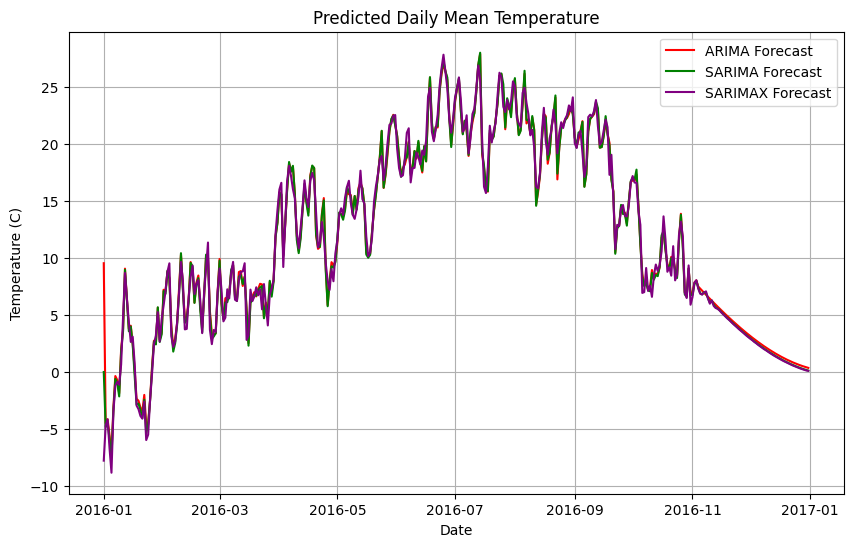

In [143]:
# Plot the predicted temperature data
plt.figure(figsize=(10, 6))
# plt.plot(data_daily.index, data_daily['Temperature (C)'], label='Actual', color='blue')
plt.plot(data_daily.index, data_daily['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(data_daily.index, data_daily['SARIMA Forecast'], label='SARIMA Forecast', color='green')
plt.plot(data_daily.index, data_daily['SARIMAX Forecast'], label='SARIMAX Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Predicted Daily Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

# ***Humidity***

In [144]:
# Initialize and fit the ARIMA model
arima_model_humidity = ARIMA(train_data['Humidity'], order=(1, 0, 0))
arima_model_fit_humidity = arima_model_humidity.fit()

# Generate forecasts for the future time points using ARIMA
arima_forecast_humidity = arima_model_fit_humidity.predict(start=test_data.index[0], end=test_data.index[-1])

In [145]:
# Initialize and fit the SARIMA model
sarima_model_humidity = SARIMAX(train_data['Humidity'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarima_model_fit_humidity = sarima_model_humidity.fit()

# Generate forecasts for the future time points using SARIMA
sarima_forecast_humidity = sarima_model_fit_humidity.predict(start=test_data.index[0], end=test_data.index[-1])

In [146]:
# Initialize and fit the SARIMA model
sarimax_model_humidity = SARIMAX(train_data['Humidity'], exog=train_data[['Wind Speed (km/h)']], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarimax_model_fit_humidity = sarimax_model_humidity.fit()

# Generate forecasts for the future time points using SARIMA
sarimax_forecast_humidity = sarimax_model_fit_humidity.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[['Wind Speed (km/h)']])


In [147]:
# Add the predicted values to the dataset
data_daily['ARIMA Forecast'] = arima_forecast_humidity
data_daily['SARIMA Forecast'] = sarima_forecast_humidity
data_daily['SARIMAX Forecast'] = sarimax_forecast_humidity

In [148]:
# Calculate evaluation metrics for ARIMA
arima_mae_humidity = mean_absolute_error(test_data['Humidity'], arima_forecast_humidity)
arima_mse_humidity = mean_squared_error(test_data['Humidity'], arima_forecast_humidity)
arima_rmse_humidity = mean_squared_error(test_data['Humidity'], arima_forecast_humidity, squared=False)

# Calculate evaluation metrics for SARIMA
sarima_mae_humidity = mean_absolute_error(test_data['Humidity'], sarima_forecast_humidity)
sarima_mse_humidity = mean_squared_error(test_data['Humidity'], sarima_forecast_humidity)
sarima_rmse_humidity = mean_squared_error(test_data['Humidity'], sarima_forecast_humidity, squared=False)

# Calculate evaluation metrics for SARIMAX
sarimax_mae_humidity = mean_absolute_error(test_data['Humidity'], sarimax_forecast_humidity)
sarimax_mse_humidity = mean_squared_error(test_data['Humidity'], sarimax_forecast_humidity)
sarimax_rmse_humidity = mean_squared_error(test_data['Humidity'], sarimax_forecast_humidity, squared=False)

print("Errors for the Humidity : ")
print("ARIMA - Mean Absolute Error (MAE):", arima_mae_humidity)
print("ARIMA - Mean Squared Error (MSE):", arima_mse_humidity)
print("ARIMA - Root Mean Squared Error (RMSE):", arima_rmse_humidity)
print()
print("SARIMA - Mean Absolute Error (MAE):", sarima_mae_humidity)
print("SARIMA - Mean Squared Error (MSE):", sarima_mse_humidity)
print("SARIMA - Root Mean Squared Error (RMSE):", sarima_rmse_humidity)
print()
print("SARIMAX - Mean Absolute Error (MAE):", sarimax_mae_humidity)
print("SARIMAX - Mean Squared Error (MSE):", sarimax_mse_humidity)
print("SARIMAX - Root Mean Squared Error (RMSE):", sarimax_rmse_humidity)

Errors for the Humidity : 
ARIMA - Mean Absolute Error (MAE): 0.062573798874188
ARIMA - Mean Squared Error (MSE): 0.00655318509089964
ARIMA - Root Mean Squared Error (RMSE): 0.08095174544689966

SARIMA - Mean Absolute Error (MAE): 0.06251732227743023
SARIMA - Mean Squared Error (MSE): 0.009246306926134379
SARIMA - Root Mean Squared Error (RMSE): 0.09615771901482677

SARIMAX - Mean Absolute Error (MAE): 0.06204447972999641
SARIMAX - Mean Squared Error (MSE): 0.009203267604360613
SARIMAX - Root Mean Squared Error (RMSE): 0.095933662519267


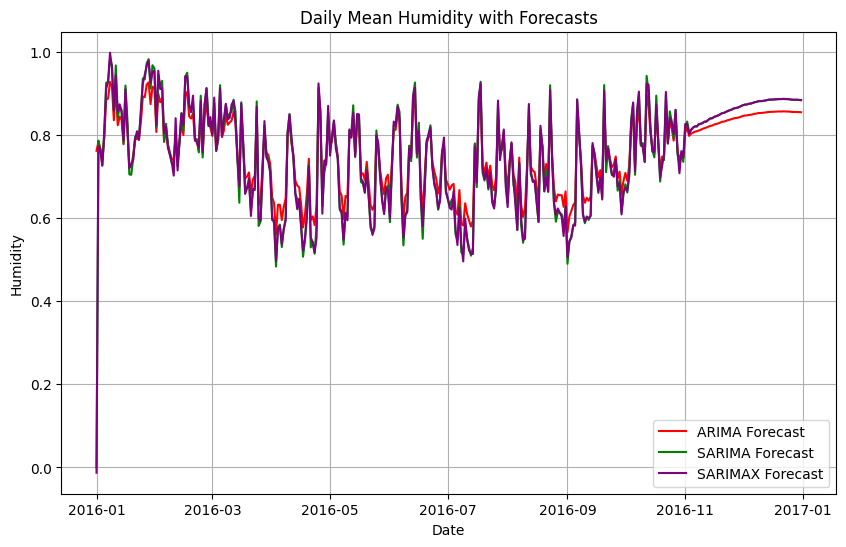

In [149]:
# Plot the predicted temperature data
plt.figure(figsize=(10, 6))
# plt.plot(data_daily.index, data_daily['Humidity'], label='Actual', color='blue')
plt.plot(data_daily.index, data_daily['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(data_daily.index, data_daily['SARIMA Forecast'], label='SARIMA Forecast', color='green')
plt.plot(data_daily.index, data_daily['SARIMAX Forecast'], label='SARIMAX Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Daily Mean Humidity with Forecasts')
plt.legend()
plt.grid(True)
plt.show()

# ***Wind Speed (km/h)***

In [150]:
# Initialize and fit the ARIMA model
arima_model_ws = ARIMA(train_data['Wind Speed (km/h)'], order=(1, 0, 0))
arima_model_fit_ws = arima_model_ws.fit()

# Generate forecasts for the future time points using ARIMA
arima_forecast_ws = arima_model_fit_ws.predict(start=test_data.index[0], end=test_data.index[-1])

In [151]:
# Initialize and fit the SARIMA model
sarima_model_ws = SARIMAX(train_data['Wind Speed (km/h)'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarima_model_fit_ws = sarima_model_ws.fit()

# Generate forecasts for the future time points using SARIMA
sarima_forecast_ws = sarima_model_fit_ws.predict(start=test_data.index[0], end=test_data.index[-1])

In [152]:
# Initialize and fit the SARIMAX model
sarimax_model_ws = SARIMAX(train_data['Wind Speed (km/h)'], exog=train_data[['Visibility (km)']], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarimax_model_fit_ws = sarimax_model_ws.fit()

# Generate forecasts for the future time points using SARIMAX
sarimax_forecast_ws = sarimax_model_fit_ws.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[['Visibility (km)']])

In [153]:
# Add the predicted values to the dataset
data_daily['ARIMA Forecast'] = arima_forecast_temp
data_daily['SARIMA Forecast'] = sarima_forecast_temp
data_daily['SARIMAX Forecast'] = sarimax_forecast_temp

In [154]:
# Calculate evaluation metrics for ARIMA
arima_mae_ws = mean_absolute_error(test_data['Wind Speed (km/h)'], arima_forecast_ws)
arima_mse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], arima_forecast_ws)
arima_rmse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], arima_forecast_ws, squared=False)

# Calculate evaluation metrics for SARIMA
sarima_mae_ws = mean_absolute_error(test_data['Wind Speed (km/h)'], sarima_forecast_ws)
sarima_mse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], sarima_forecast_ws)
sarima_rmse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], sarima_forecast_ws, squared=False)

# Calculate evaluation metrics for SARIMAX
sarimax_mae_ws = mean_absolute_error(test_data['Wind Speed (km/h)'], sarimax_forecast_ws)
sarimax_mse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], sarimax_forecast_ws)
sarimax_rmse_ws = mean_squared_error(test_data['Wind Speed (km/h)'], sarimax_forecast_ws, squared=False)

print("Errors for the Wind Speed (km/h) : ")
print("ARIMA - Mean Absolute Error (MAE):", arima_mae_ws)
print("ARIMA - Mean Squared Error (MSE):", arima_mse_ws)
print("ARIMA - Root Mean Squared Error (RMSE):", arima_rmse_ws)
print()
print("SARIMA - Mean Absolute Error (MAE):", sarima_mae_ws)
print("SARIMA - Mean Squared Error (MSE):", sarima_mse_ws)
print("SARIMA - Root Mean Squared Error (RMSE):", sarima_rmse_ws)
print()
print("SARIMAX - Mean Absolute Error (MAE):", sarimax_mae_ws)
print("SARIMAX - Mean Squared Error (MSE):", sarimax_mse_ws)
print("SARIMAX- Root Mean Squared Error (RMSE):", sarimax_rmse_ws)

Errors for the Wind Speed (km/h) : 
ARIMA - Mean Absolute Error (MAE): 2.805124651106642
ARIMA - Mean Squared Error (MSE): 14.683752597053852
ARIMA - Root Mean Squared Error (RMSE): 3.831938490771199

SARIMA - Mean Absolute Error (MAE): 3.280879295349108
SARIMA - Mean Squared Error (MSE): 19.734444964193056
SARIMA - Root Mean Squared Error (RMSE): 4.442346785674555

SARIMAX - Mean Absolute Error (MAE): 3.189297506945508
SARIMAX - Mean Squared Error (MSE): 17.429325514495748
SARIMAX- Root Mean Squared Error (RMSE): 4.174844370092824


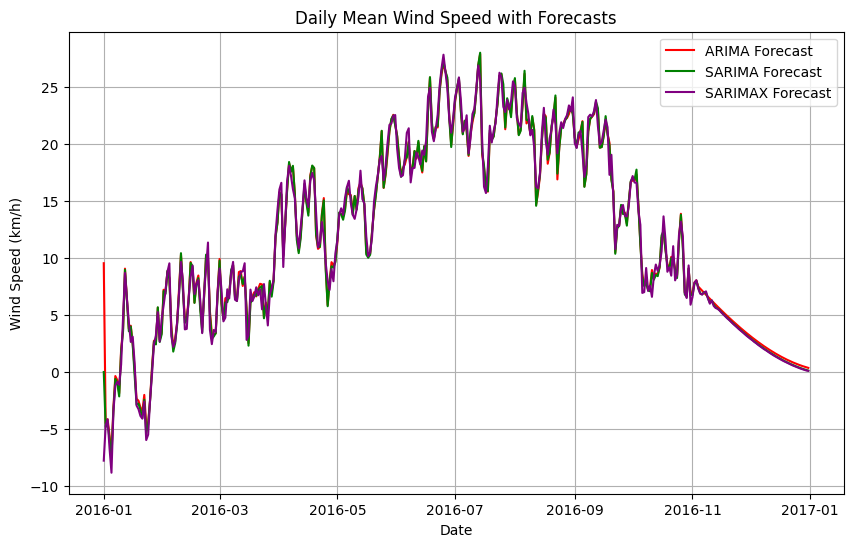

In [155]:
# Plot the predicted temperature data
plt.figure(figsize=(10, 6))
# plt.plot(data_daily.index, data_daily['Temperature (C)'], label='Actual', color='blue')
plt.plot(data_daily.index, data_daily['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(data_daily.index, data_daily['SARIMA Forecast'], label='SARIMA Forecast', color='green')
plt.plot(data_daily.index, data_daily['SARIMAX Forecast'], label='SARIMAX Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Daily Mean Wind Speed with Forecasts')
plt.legend()
plt.grid(True)
plt.show()

# ***Visibility***

In [156]:
# Initialize and fit the ARIMA model
arima_model_visibility = ARIMA(train_data['Visibility (km)'], order=(1, 0, 0))
arima_model_fit_visibility = arima_model_visibility.fit()

# Generate forecasts for the future time points using ARIMA
arima_forecast_visibility = arima_model_fit_visibility.forecast(steps=len(test_data))

In [157]:
# Initialize and fit the SARIMA model
sarima_model_visibility = SARIMAX(train_data['Visibility (km)'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarima_model_fit_visibility = sarima_model_visibility.fit()

# Generate forecasts for the future time points using SARIMA
sarima_forecast_visibility = sarima_model_fit_visibility.predict(start=test_data.index[0], end=test_data.index[-1])

In [158]:
# Initialize and fit the SARIMAX model
sarimax_model_visibility = SARIMAX(train_data['Visibility (km)'], exog=train_data[['Temperature (C)']], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarimax_model_fit_visibility = sarimax_model_visibility.fit()

# Generate forecasts for the future time points using SARIMAX
sarimax_forecast_visibility = sarimax_model_fit_visibility.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[['Temperature (C)']])

In [159]:
# Add the predicted values to the dataset
data_daily['ARIMA Forecast'] = arima_forecast_temp
data_daily['SARIMA Forecast'] = sarima_forecast_temp
data_daily['SARIMAX Forecast'] = sarimax_forecast_temp

In [160]:
# Calculate evaluation metrics for ARIMA
arima_mae_visibility = mean_absolute_error(test_data['Visibility (km)'], arima_forecast_visibility)
arima_mse_visibility = mean_squared_error(test_data['Visibility (km)'], arima_forecast_visibility)
arima_rmse_visibility = mean_squared_error(test_data['Visibility (km)'], arima_forecast_visibility, squared=False)

# Calculate evaluation metrics for SARIMA
sarima_mae_visibility = mean_absolute_error(test_data['Visibility (km)'], sarima_forecast_visibility)
sarima_mse_visibility = mean_squared_error(test_data['Visibility (km)'], sarima_forecast_visibility)
sarima_rmse_visibility = mean_squared_error(test_data['Visibility (km)'], sarima_forecast_visibility, squared=False)

# Calculate evaluation metrics for SARIMAX
sarimax_mae_visibility = mean_absolute_error(test_data['Visibility (km)'], sarimax_forecast_visibility)
sarimax_mse_visibility = mean_squared_error(test_data['Visibility (km)'], sarimax_forecast_visibility)
sarimax_rmse_visibility = mean_squared_error(test_data['Visibility (km)'], sarimax_forecast_visibility, squared=False)

print("Errors for the Visibility (km) : ")
print("ARIMA - Mean Absolute Error (MAE):", arima_mae_visibility)
print("ARIMA - Mean Squared Error (MSE):", arima_mse_visibility)
print("ARIMA - Root Mean Squared Error (RMSE):", arima_rmse_visibility)
print()
print("SARIMA - Mean Absolute Error (MAE):", sarima_mae_visibility)
print("SARIMA - Mean Squared Error (MSE):", sarima_mse_visibility)
print("SARIMA - Root Mean Squared Error (RMSE):", sarima_rmse_visibility)
print()
print("SARIMAX - Mean Absolute Error (MAE):", sarimax_mae_visibility)
print("SARIMAX- Mean Squared Error (MSE):", sarimax_mse_visibility)
print("SARIMAX - Root Mean Squared Error (RMSE):", sarimax_rmse_visibility)

Errors for the Visibility (km) : 
ARIMA - Mean Absolute Error (MAE): 2.9731618070340207
ARIMA - Mean Squared Error (MSE): 13.454594988352618
ARIMA - Root Mean Squared Error (RMSE): 3.6680505705827744

SARIMA - Mean Absolute Error (MAE): 1.6348590798414124
SARIMA - Mean Squared Error (MSE): 5.834949838604313
SARIMA - Root Mean Squared Error (RMSE): 2.4155640829016134

SARIMAX - Mean Absolute Error (MAE): 1.5710931169910585
SARIMAX- Mean Squared Error (MSE): 5.356570238868082
SARIMAX - Root Mean Squared Error (RMSE): 2.31442654644041


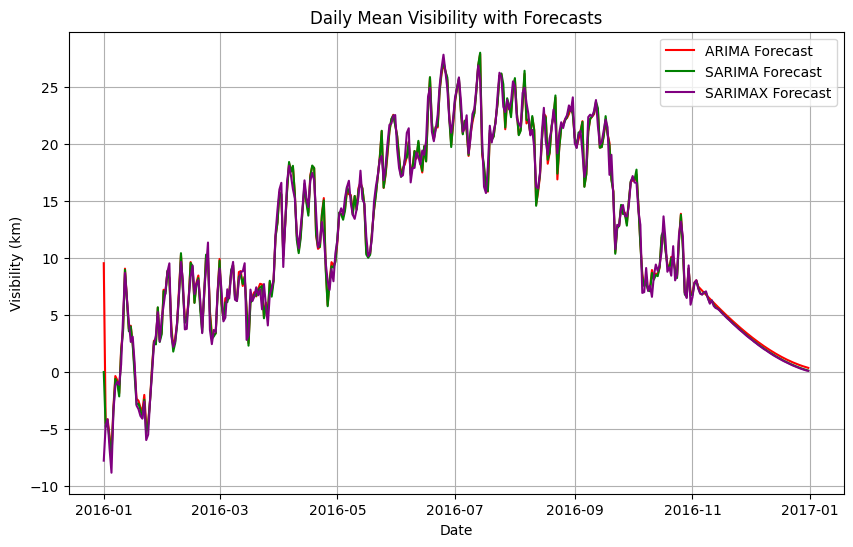

In [161]:
# Plot the predicted temperature data
plt.figure(figsize=(10, 6))
# plt.plot(data_daily.index, data_daily['Temperature (C)'], label='Actual', color='blue')
plt.plot(data_daily.index, data_daily['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(data_daily.index, data_daily['SARIMA Forecast'], label='SARIMA Forecast', color='green')
plt.plot(data_daily.index, data_daily['SARIMAX Forecast'], label='SARIMAX Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.title('Daily Mean Visibility with Forecasts')
plt.legend()
plt.grid(True)
plt.show()

# ***Step 9 : Print All The Predicted Data***

In [162]:
data_daily

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),ARIMA Forecast,SARIMA Forecast,SARIMAX Forecast
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,0.890000,17.114300,9.982000,NaN,NaN,NaN
2006-01-01 00:00:00+00:00,4.075000,0.817083,21.229192,11.348487,NaN,NaN,NaN
2006-01-02 00:00:00+00:00,5.263194,0.847083,17.824713,8.492079,NaN,NaN,NaN
2006-01-03 00:00:00+00:00,2.340509,0.897083,7.726658,9.223958,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,2.251852,0.906667,12.152817,8.352546,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-12-27 00:00:00+00:00,0.278009,0.890000,10.979529,7.303362,0.576777,0.341008,0.298400
2016-12-28 00:00:00+00:00,0.222222,0.890000,10.968125,7.304704,0.517926,0.281279,0.237906
2016-12-29 00:00:00+00:00,0.167824,0.889583,10.876892,7.310071,0.463585,0.225868,0.186167
